# Visualizing Horror Movie Data
by Salome "Sam" Grasland     
samgrasland@gmail.com      
[Github](https://github.com/SSGrasland/DSStudyGroup)    

## Importing Libraries`
[pandas](https://pandas.pydata.org/)  
[matplotlib](https://matplotlib.org/)   
[seaborn](https://seaborn.pydata.org/index.html)   

In [1]:
"Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language."
import pandas as pd

#for visualizing data 
"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible."
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
"Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics."
import seaborn as sns

from colorspacious import cspace_converter

# Set the display option to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

## Data Cleaning & Exploration 

Data was sourced from Kaggle. The dataset is ["Horror Movies - the best Hollywood Investments?"](https://www.kaggle.com/datasets/sujaykapadnis/horror-movies-profits-dataset) authored by SUJAY KAPADNIS. 

In [2]:
#open dataset
df = pd.read_csv(r'C:\Users\salom\OneDrive\Área de Trabalho\DSStudyGroup\movie_profit.csv', encoding='unicode_escape')
df.head()

,ID,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,229,"Friday, March 15, 2019",Wonder Park,100000000.00,0.00,0.00,Paramount Pictures,PG,Adventure
1,31,"Friday, December 21, 2018",Aquaman,160000000.00,0.00,0.00,Warner Bros.,PG-13,Action
2,1141,"Friday, October 12, 2018",Goosebumps 2: Haunted Halloween,35000000.00,28804812.00,39904812.00,Sony Pictures,PG,Horror
3,619,"Friday, October 12, 2018",First Man,60000000.00,30000050.00,55500050.00,Universal,PG-13,Drama
4,2987,"Friday, October 5, 2018",Hevi reissu,3800000.00,9079.00,9079.00,Music Box Films,NaN,Comedy


In [3]:
#dropping missing values 
df.drop(df[df['domestic_gross'] == 0].index, inplace = True)

In [4]:
#checking for other missing values 
#these missing values arent relevant
#so will leave them 
df.isna().sum()

ID                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
distributor           41
mpaa_rating          126
genre                  0
dtype: int64

In [5]:
#get descriptive stats
df.describe()

,ID,production_budget,domestic_gross,worldwide_gross
count,3335.00,3335.00,3335.00,3335.00
mean,1682.93,33702231.41,46320695.51,95945331.03
std,977.50,34955066.10,59053462.70,141696229.00
min,1.00,250000.00,423.00,423.00
25%,836.50,10000000.00,6881213.00,11538825.50
50%,1676.00,20000000.00,26483452.00,41921590.00
75%,2516.50,45000000.00,61359762.50,120146175.00
max,3401.00,175000000.00,474544677.00,1304866322.00


# [Barcharts](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

A bar chart is a good choice when you want to show how some quantity varies among
some discrete set of items. Below will show how to create a simple bar chart showing genre count and a grouped bar chart comparing genre count in October versus the rest of the year. 


## Simple Barchart

In [6]:
#getting count for genre
Count = df['genre'].value_counts()
print(Count)

Drama        1212
Comedy        803
Action        559
Adventure     471
Horror        290
Name: genre, dtype: int64


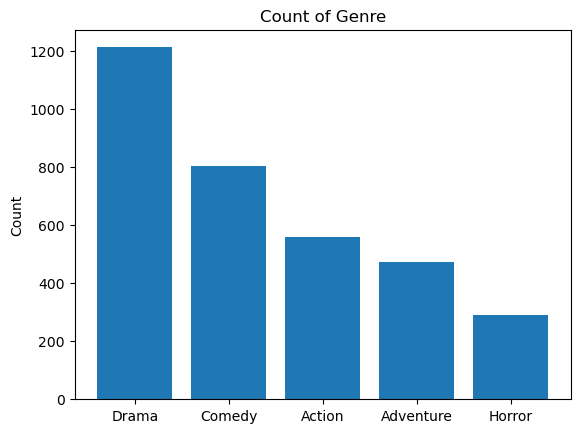

In [7]:
#creating list of genres
Genre = ['Drama', 'Comedy', 'Action', 'Adventure', 'Horror']

# plot bars with left x-coordinates [0, 200, 400, 600, 800, 1000, 1200], heights = Count
plt.bar(range(len(Genre)), Count)
plt.title("Count of Genre") # add a title
plt.ylabel("Count") # label the y-axis

# label x-axis with genre names at bar centers
plt.xticks(range(len(Genre)), Genre)
plt.show()


## Grouped Barchart Comparing Genre Count During October and the Rest of the Year

In [8]:
#genre count for whole year
count = df['genre'].value_counts()
print(count)

Drama        1212
Comedy        803
Action        559
Adventure     471
Horror        290
Name: genre, dtype: int64


In [9]:
#isolating dataset to just October
oct_df = df[df['release_date'].str.contains('October')]
count_oct = oct_df['genre'].value_counts()
print(count_oct)

Drama        155
Comedy        67
Horror        53
Action        40
Adventure     23
Name: genre, dtype: int64


In [10]:
#creating dataframe for bar chart 
df_bar = pd.DataFrame() 

#engineering columns 
df_bar['Count'] = count
df_bar['Count_Oct'] = count_oct

#creating column based on percent so x axis can be similar
df_bar['Count_Percent'] = (df_bar['Count']/df_bar['Count'].sum())*100
df_bar['Count_Oct_Percent'] = (df_bar['Count_Oct']/df_bar['Count_Oct'].sum())*100

#resetting index 
df_bar.reset_index(inplace = True)

#changing column name 
df_bar = df_bar.rename(columns={'index': 'Genre'})
df_bar.head()

,Genre,Count,Count_Oct,Count_Percent,Count_Oct_Percent
0,Drama,1212,155,36.34,45.86
1,Comedy,803,67,24.08,19.82
2,Action,559,40,16.76,11.83
3,Adventure,471,23,14.12,6.80
4,Horror,290,53,8.70,15.68


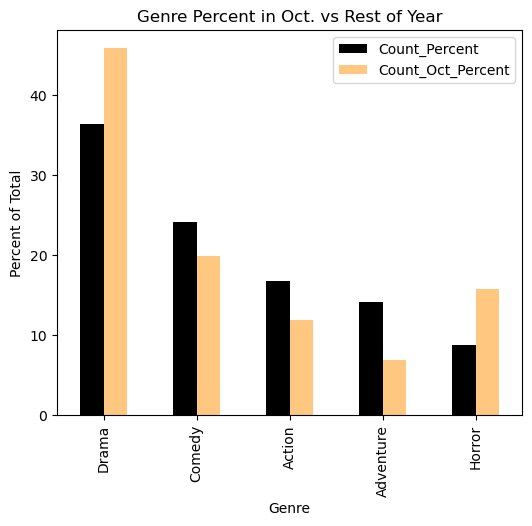

In [11]:
# plot the dataframe
df_bar.plot(x='Genre', y=['Count_Percent', 'Count_Oct_Percent'], title = 'Genre Percent in Oct. vs Rest of Year', ylabel = 'Percent of Total',  kind="bar", colormap='copper', figsize=(6, 5))
 
# print bar graph
plt.show()

### Matplotlib Colors

https://matplotlib.org/stable/users/explain/colors/colormaps.html

# [Boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) Showing ROI of Genres



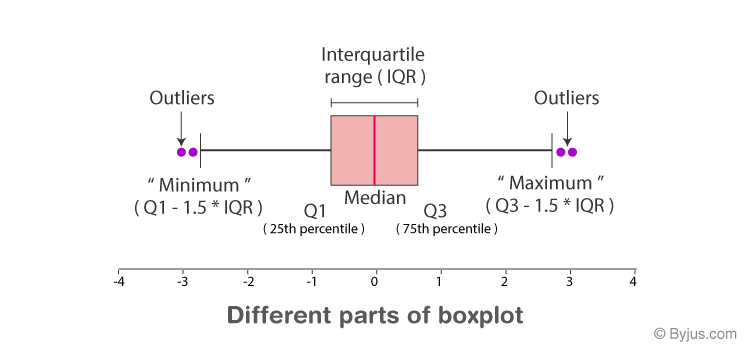

In [12]:
from IPython import display
display.Image(r"C:\Users\salom\OneDrive\Área de Trabalho\DSStudyGroup\Box-Plot-and-Whisker-Plot-1.png")

## Engingeering Needed Data
To visualize the ROI we will need to engineer it from the existing data.

In [13]:
#Calculate the ROI:
#ROI = (Total Box Office Revenue - Production Budget) / Production Budget
#Convert the result to a percentage (optional):
#You can express the ROI as a percentage by multiplying the result by 100.

df['ROI'] = ((df['worldwide_gross'] - df['production_budget'])/df['production_budget'])
df['ROI'] = df['ROI']*100
df.head()

,ID,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,ROI
2,1141,"Friday, October 12, 2018",Goosebumps 2: Haunted Halloween,35000000.00,28804812.00,39904812.00,Sony Pictures,PG,Horror,14.01
3,619,"Friday, October 12, 2018",First Man,60000000.00,30000050.00,55500050.00,Universal,PG-13,Drama,-7.50
4,2987,"Friday, October 5, 2018",Hevi reissu,3800000.00,9079.00,9079.00,Music Box Films,NaN,Comedy,-99.76
5,200,"Friday, October 5, 2018",Venom,100000000.00,171125095.00,461825095.00,Sony Pictures,PG-13,Action,361.83
6,1073,"Friday, October 5, 2018",A Star is Born,36000000.00,126181246.00,200881246.00,Warner Bros.,R,Drama,458.00


## Visualizing Highest ROI
We're going to visualize the top 100 movies by ROI and group by genre. 

In [14]:
#sort the dataframe by highest ROI 
top_ROI = df.sort_values(by='ROI', ascending=False).head(100)
top_ROI.head(10)

,ID,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,ROI
1114,3365,"Friday, September 25, 2009",Paranormal Activity,450000.00,107918810.00,194183034.00,Paramount Pictures,R,Horror,43051.79
2547,3339,"Wednesday, July 14, 1999",The Blair Witch Project,600000.00,140539099.00,248300000.00,Artisan,R,Horror,41283.33
3397,3320,"Thursday, August 13, 1942",Bambi,858000.00,102797000.00,268000000.00,RKO Radio Pictures,G,Drama,31135.43
3337,3257,"Sunday, November 21, 1976",Rocky,1000000.00,117235147.00,225000000.00,United Artists,PG,Drama,22400.00
3320,3382,"Tuesday, October 17, 1978",Halloween,325000.00,47000000.00,70000000.00,Compass International,R,Horror,21438.46
3359,3330,"Saturday, August 11, 1973",American Graffiti,777000.00,115000000.00,140000000.00,Universal,PG,Drama,17918.02
1883,3370,"Friday, June 11, 2004",Napoleon Dynamite,400000.00,44540956.00,46122713.00,Fox Searchlight,PG,Comedy,11430.68
3299,3345,"Friday, May 9, 1980",Friday the 13th,550000.00,39754601.00,59754601.00,Paramount Pictures,NaN,Horror,10764.47
763,3258,"Friday, January 6, 2012",The Devil Inside,1000000.00,53262945.00,101759490.00,Paramount Pictures,R,Horror,10075.95
3399,2983,"Friday, December 15, 1939",Gone with the Wind,3900000.00,198680470.00,390525192.00,MGM,G,Drama,9913.47


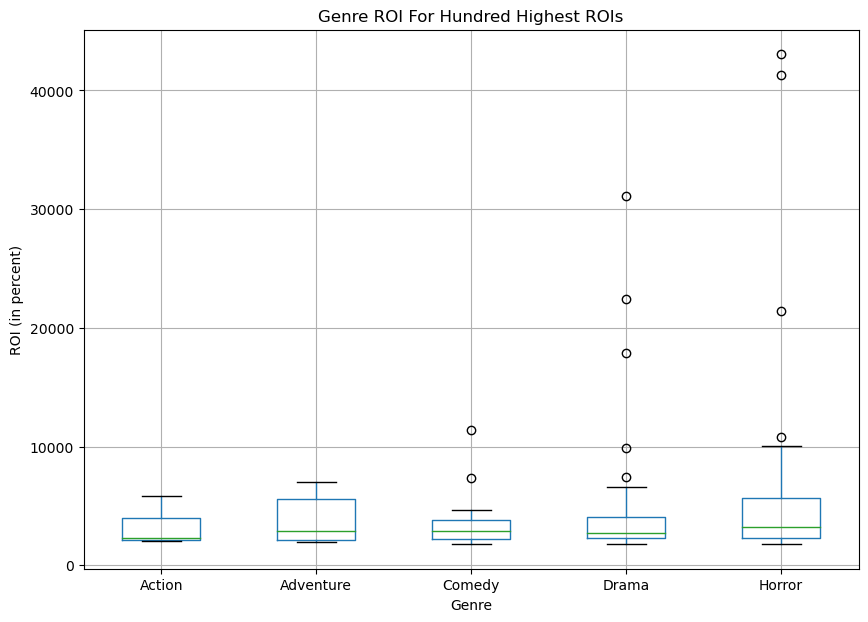

In [15]:
#Generate a box and whiskers plot for all five genres 

#creating a dataframe that has just genre and ROI
top_ROI = top_ROI[['ROI', 'genre']]

#pivoting the values 
top_ROI = top_ROI.pivot(columns='genre', values='ROI')

#plotting
box = top_ROI.boxplot(figsize = (10,7,));

#adding title
plt.title('Genre ROI For Hundred Highest ROIs')
#adding xlabel 
plt.xlabel('Genre')
#adding ylabel
plt.ylabel('ROI (in percent)');

plt.show()

## Visualizing the Lowest ROI 

Now let's look at the bottom 100 movies by ROI, sorted by genre. 

In [16]:
#sort the dataframe by highest ROI 
bottom_ROI = df.sort_values(by='ROI').head(100)
bottom_ROI.head(10)

,ID,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,ROI
361,2572,"Friday, May 8, 2015",Skin Trade,9000000.00,1242.00,1242.00,Magnolia Pictures,R,Action,-99.99
2738,1445,"Sunday, August 24, 1997",The Grimm Brothers' Snow White,26000000.00,5000.00,5000.00,Gramercy,PG-13,Horror,-99.98
1604,3306,"Friday, April 21, 2006",In Her Line of Fire,1000000.00,884.00,884.00,Regent Releasing,R,Action,-99.91
1101,2522,"Friday, October 16, 2009",Janky Promoters,10000000.00,9069.00,9069.00,Third Rail,R,Comedy,-99.91
358,3305,"Friday, May 15, 2015",Childless,1000000.00,1036.00,1036.00,Monterey Media,R,Drama,-99.90
1689,3377,"Thursday, October 13, 2005",The Dark Hours,400000.00,423.00,423.00,Freestyle Releasing,R,Horror,-99.89
292,2322,"Wednesday, November 11, 2015",10 Days in a Madhouse,12000000.00,14616.00,14616.00,Cafe Pictures,R,Drama,-99.88
2104,2126,"Friday, October 25, 2002",All the Queen's Men,15000000.00,22723.00,22723.00,Strand,PG-13,Comedy,-99.85
1694,3079,"Friday, September 30, 2005",My Big Fat Independent Movie,3000000.00,4655.00,4655.00,Big Fat Movies,R,Comedy,-99.84
183,3122,"Sunday, October 16, 2016",Mi America,2100000.00,3330.00,3330.00,Industrial House Films,R,Drama,-99.84


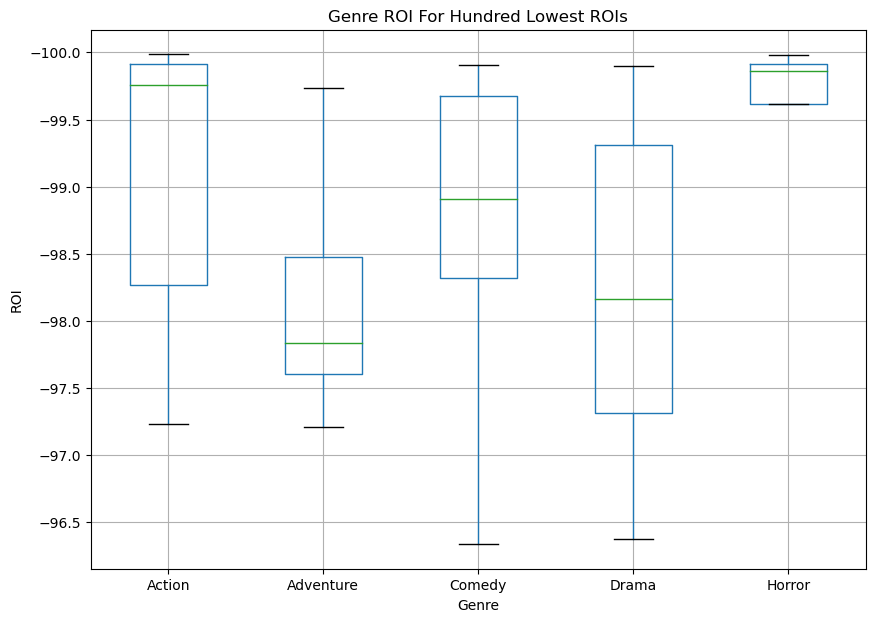

In [17]:
# Creating a DataFrame with just 'genre' and 'ROI'
bottom_ROI = bottom_ROI[['ROI', 'genre']]

# Pivoting the values
bottom_ROI = bottom_ROI.pivot(columns='genre', values='ROI')

# Plotting the box and whisker plot
box = bottom_ROI.boxplot(figsize=(10, 7), showfliers=False)

# Invert the Y-axis
plt.gca().invert_yaxis()

# Adding a title
plt.title('Genre ROI For Hundred Lowest ROIs')

# Adding xlabel
plt.xlabel('Genre')

# Adding ylabel
plt.ylabel('ROI')

# Show the plot
plt.show()

## [Violin Plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html) showing ROI For Horror Movies
A [violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) plays a similar role as a box-and-whisker plot. A violin plot is a data visualization that combines aspects of a box plot and a kernel density plot to provide a richer representation of the distribution of data. It's particularly useful for visualizing the distribution of a dataset and comparing multiple categories or groups. 

In [18]:
#limit datast to horror genre
violin_ROI = df.sort_values(by='ROI', ascending=False)
violin_ROI = violin_ROI[violin_ROI['genre'].str.contains('Horror')]
violin_ROI.head(10)

,ID,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,ROI
1114,3365,"Friday, September 25, 2009",Paranormal Activity,450000.00,107918810.00,194183034.00,Paramount Pictures,R,Horror,43051.79
2547,3339,"Wednesday, July 14, 1999",The Blair Witch Project,600000.00,140539099.00,248300000.00,Artisan,R,Horror,41283.33
3320,3382,"Tuesday, October 17, 1978",Halloween,325000.00,47000000.00,70000000.00,Compass International,R,Horror,21438.46
3299,3345,"Friday, May 9, 1980",Friday the 13th,550000.00,39754601.00,59754601.00,Paramount Pictures,NaN,Horror,10764.47
763,3258,"Friday, January 6, 2012",The Devil Inside,1000000.00,53262945.00,101759490.00,Paramount Pictures,R,Horror,10075.95
1834,3236,"Friday, October 29, 2004",Saw,1200000.00,55968727.00,103880027.00,Lionsgate,R,Horror,8556.67
889,3197,"Friday, April 1, 2011",Insidious,1500000.00,54009150.00,99870886.00,FilmDistrict,R,Horror,6558.06
368,3259,"Friday, April 17, 2015",Unfriended,1000000.00,32789645.00,62869004.00,Universal,R,Horror,6186.90
951,3030,"Wednesday, October 20, 2010",Paranormal Activity 2,3000000.00,84752907.00,177512032.00,Paramount Pictures,R,Horror,5817.07
148,2812,"Friday, January 20, 2017",Split,5000000.00,138141585.00,278306227.00,Universal,PG-13,Horror,5466.12


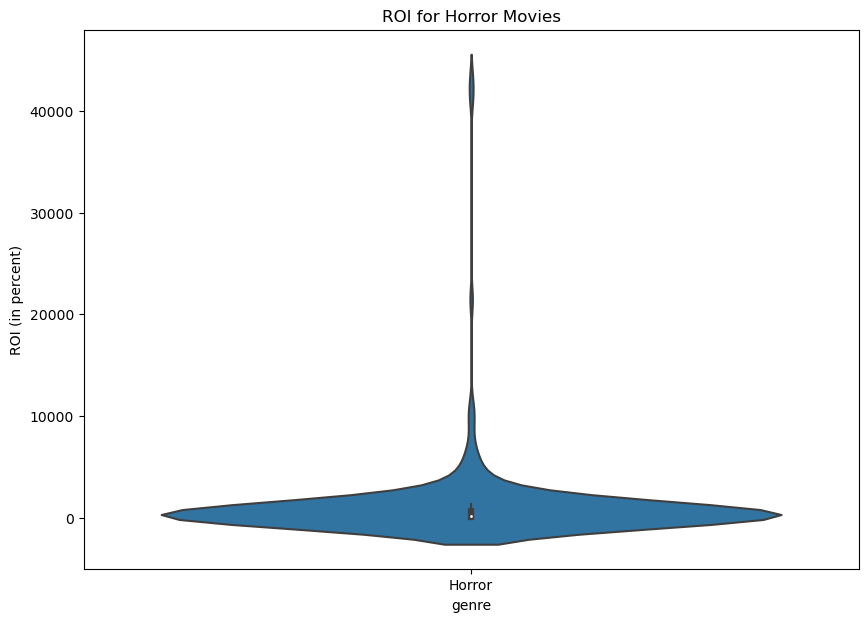

In [19]:
# Creating a DataFrame with just 'genre' and 'ROI'
violin_ROI = violin_ROI[['ROI', 'genre']]

# Create a violin plot using Seaborn
plt.figure(figsize=(10, 7))
sns.violinplot(data=violin_ROI, x='genre', y='ROI', inner='box', split=True)

# Adding a title
plt.title('ROI for Horror Movies')

# Adding ylabel
plt.ylabel('ROI (in percent)')

# Show the plot
plt.show()

# [Line chart](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
These are a good choice for showing trends. Let's create a linegraph showing how horror movies perform over the year internationally and domestically. 

In [20]:
# Convert the 'Date' column to datetime type if it's not already
df['date'] = pd.to_datetime(df['release_date'])

# Create a new column 'Month' with just the month
df['month'] = df['date'].dt.month

In [21]:
#let's keep only values from 'Horror' 
df_horror = df[df['genre'].str.contains('Horror')]

In [22]:
#saving this dataframe to use for scatterplot later 
df_scatter = df_horror

In [23]:
#limiting dataset to just needed columns 
df_horror = df_horror[['month', 'domestic_gross', 'worldwide_gross']]

#grouping by month and getting the sum 
df_horror = df_horror.groupby('month').sum()
df_horror

,domestic_gross,worldwide_gross
month,,
1,747038798.00,1331764677.00
2,937845302.00,1600454732.00
3,436781858.00,758674446.00
4,775826584.00,1395110695.00
5,458312247.00,944473028.00
6,824990481.00,1492083712.00
7,764496485.00,1424850292.00
8,1244595264.00,2507210827.00
9,1030998037.00,2157129723.00


In [24]:
#reseting the index 
df_horror.reset_index(inplace=True)

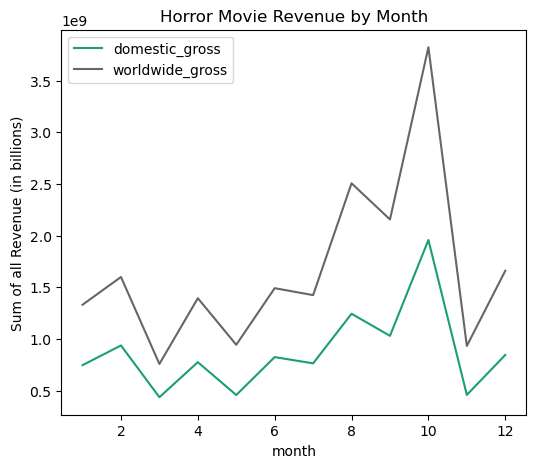

In [25]:
# plot the dataframe
df_horror.plot(x='month', y=['domestic_gross', 'worldwide_gross'], title = 'Horror Movie Revenue by Month', kind="line", ylabel= 'Sum of all Revenue (in billions)', colormap='Dark2', figsize=(6, 5))
 
# print bar graph
plt.show()


# [Scatterplot](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html) showing Day versus Average Revenue for the Month of October


In [26]:
#limiting the dataframe to just October
df_scatter = df_scatter[df_scatter['release_date'].str.contains('October')]

In [27]:
#Getting just day from the date
df_scatter['day'] = df_scatter['date'].dt.day

In [28]:
#creating a dataframe for the scatterplot
df_scatter = df_scatter[['day', 'worldwide_gross']]

In [29]:
#grouping by day and getting the average worldwide_gross
df_scatter = df_scatter.groupby('day').mean()
df_scatter

,worldwide_gross
day,
1,14898140.00
3,256862920.00
8,9002970.50
10,27846295.00
11,10803211.00
12,39904812.00
13,65252420.67
14,18090181.00
16,95021369.00


In [30]:
df_scatter.reset_index(inplace=True)

C:\Users\salom\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


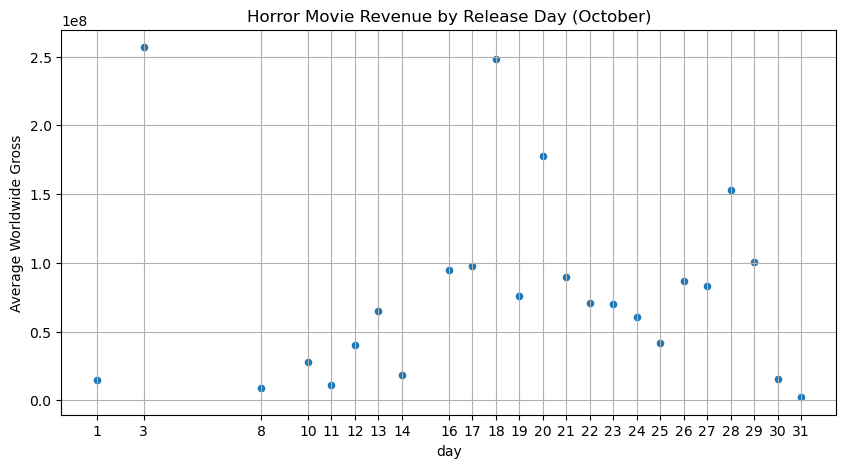

In [31]:
# plot the dataframe
df_scatter.plot(x='day', y='worldwide_gross', ylabel = 'Average Worldwide Gross', title = 'Horror Movie Revenue by Release Day (October)', kind="scatter", colormap='Dark2', xticks = df_scatter['day'].unique(), grid = 'True', figsize=(10, 5))
 
# print bar graph
plt.show()